## 해석 우선순위

    SELECT    columns    : 5  
    FROM      table      : 1  
    WHERE     condition  : 2  
    GROUP BY  columns    : 3  
    HAVING    condition  : 4  
    ORDER BY  columns    : 6  

---

## 테이블 스키마

    DESC 'table 이름'
    
---

## Date

    SELECT  date
    FROM    Customers
    WHERE   DATE(date)
    BETWEEN '2022-01-01 00:00:00'
    AND     '2022-01-31 23:59:59'
    
---

## LIKE

    SELECT    * 
    FROM      Custemers
    WHERE     City
    NOT LIKE 's%'
    
---

## 리스트
 
    SELECT  *
    FROM    Customers
    WHERE   Country
    IN (SELECT Country
        FROM Suppliers)
        
---

## ANY

    SELECT ages
    FROM   Mytable
    WHERE  ages = ANY(1,4)
    
    => SELECT ages
       FROM   Mytable
       WHERE  ages = 1
       OR     ages = 4
       
---

## ALL

    SELECT ages
    FROM   Mytable
    WHERE  ages < ALL(1,4)
    
    => SELECT ages
       FROM   Mytable
       WHERE  ages < 1
       AND     ages < 4
       
---

## ANY 응용

    SELECT ProductName
    FROM   Products
    WHERE  ProductID
           = ANY(SELECT ProductID
                 FROM   OrderDetails
                 WHERE  Quantity = 10)

---

## ORDER BY / LIMIT / OFFSET

OFFSET은 앞에서 offset만큼 건너뛰고 쿼리, LIMIT과 같이 써야 함.

    SELECT    c1, c2
    FROM      t
    ORDER BY  c1 DESC
    LIMIT     n
    OFFSET    offset;
    
---

## 숫자 계산

    SELECT abc(c1) FROM t;  절대값  
      
    SELECT ceil(c1) FROM t;  소수점 이하 올림  
      
    SELECT floor(c1) FROM t;  소수점 이하 버림  
      
    SELECT pow(x,y) FROM t;  x의 y승
      
    SELECT mod(분자,분모) FROM t;  분자를 분모로 나눈 나머지, %로 대체 가능  
      
    SELECT greatest(c1,c2,...) FROM t;  서로다른 컬럼 사이에서 가장 큰 값, NULL이 있으면 NULL  
      
    SELECT least(c1,c2,...) FROM t;  서로다른 컬럼 사이에서 가장 작은 값, NULL이 있으면 NULL  
      
    SELECT round(c1) FROM t;  반올림  
      
    SELECT round(숫자,자릿수) FROM t;  자릿수까지 남기고 반올림  
    
    SELECT truncate(숫자,자릿수) FROM t;  자릿수까지 남기고 버림  
    
    SELECT stddev(c1) FROM t;  표준편차  
    
    SELECT variant(c1) FROM t;  분산  

---

## 집계함수

    SELECT count(*) FROM t;  NULL 상관없이 모든 row 수  

    SELECT count(id) FROM t;  해당 컬럼에서 NULL을 제외한 row 수  

    SELECT sum(c1) FROM t;  컬럼 값들의 합  

    SELECT sum(c1) FROM t GROUP BY c1;  컬럼 값들의 합  
    
    SELECT max(c1) FROM t;  컬럼 값 중 최대값  
    
    SELECT min(c1) FROM t;  컬럼 값 중 최소값  

    SELECT avg(c1) FROM t;  컬럼 값들의 평균  
    
---

## HAVING

    SELECT    COUNT(CustomerID)
    FROM      Customers
    GROUP BY  Country
    HAVING    COUNT(CustomerID) >= 5;
    
---

## EXIST

    SELECT   SupplierName
    FROM     Suppliers
    WHERE EXIST( SELECT  ProductName
                 FROM    Products, Suppliers
                 WHERE   Products.SupplierID
                         = Suppliers.SupplierID
                 AND     Products.Price < 20 )
                 
---

## CASE

    ex1)
    SELECT Id, Sex, Name,
        CASE
         WHEN Age >= 50 THEN 'D'
         WHEN Age >= 40 THEN 'C'
         WHEN Age >= 30 THEN 'B'
         WHEN Age >= 20 THEN 'A'
         ELSE 'Too Young'
    END AS Group
    FROM People;
    
    ex2)
    SELECT Id, A, B, C
    FROM t
    ORDER BY
    ( CASE
      WHEN OrderStendard = false THEN Id
      ELSE OrderStendard
      END );
      
    ex3)
    SELECT
    ( CASE
      
      WHEN category = 1
      AND supplier = 1 
      THEN 'A'
      
      WHEN category = 2
      OR supplier = 3
      THEN 'B'
      
      ELSE 'C' )
    FROM t;
    
---

## JOIN

    교집합)
    SELECT       col
    FROM         A
    INNER JOIN   B
    ON           A.key = B.key
    
    바깥 요소만)
    SELECT            col
    FROM              A
    FULL OUTER JOIN   B
    ON                A.key = B.key
    WHERE             A.key IS NULL
    OR                B.key IS NULL
    
    테이블 3개)
    SELECT       col
    FROM         A
    INNER JOIN   B
    ON           A.key = B.key
    INNER JOIN   C
    ON           A.key = C.key
    
---

## CROSS JOIN

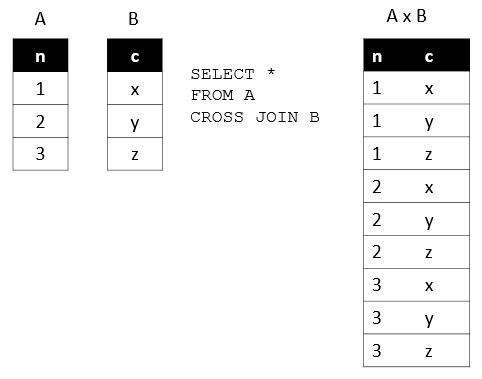

---

## UNION

쿼리 A 와 쿼리 B 의 결과를 합칠 수 있음.  
다시 말해, 쿼리 A 의 결과 테이블 아래에 쿼리 B 의 결과를 이어서 하나의 테이블로 만든다는 것  
쿼리 A의 결과와 쿼리 B 의 결과의 column 개수와 column 들의 데이터 타입 및 순서(order) 가 똑같아야 함.  

    중복은 제거)
    SELECT column_names FROM t1
    UNION
    SELECT column_names FROM t2

    중복도 포함)
    SELECT column_names FROM t1
    UNION ALL
    SELECT column_names FROM t2
    
---

## NULL

    SELECT   FirstName, 
             IFNULL(MiddleName, ""), 
             LastName
    FROM     People;
    
---

## Sub Query

    From)
    SELECT   sub.a, sub.b
    FROM     ( SELECT  a,b
               FROM    t ) sub
    WHERE    sub.a > 10;
    
    Where, having)
    SELECT   *
    FROM     crimes
    WHERE    date = ( SELECT MIN(date) FROM crimes )
    
---

## Window

    ex1 파티션)
    SELECT Id,
           Name,
           Salary,
           DepartmentId,
           MAX(Salary) OVER (PARTITION BY DepartmentId) AS MaxSalary
    FROM   Employee;
    
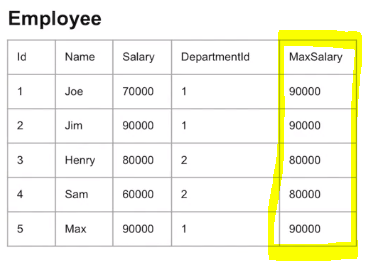
    
    
    ex2 누적합)
    SELECT Id,
           Name,
           kg,
           Line,
           SUM(kg) OVER (ORDER BY Line) AS CumSum
    FROM Elevator;
    
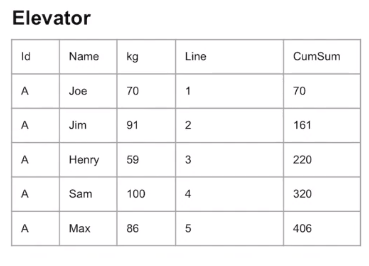
    
    
    ex3 파티션 내 누적합)
    SELECT Id,
           Name,
           kg,
           Line,
           SUM(kg) OVER (ORDER BY Line PARTITION BY Id) AS CumSum
    FROM Elevator;
    
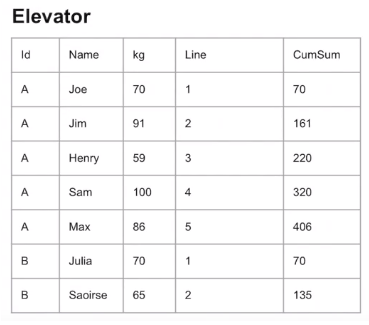
    
    
---

## LAG, LEAD

LAG/LEAD(col, n, val) : col의 값을 n만큼 내리거나(LAG) 올리는데(LEAD)
                        빈칸은 val로 채움

    SELECT Id,
           RecordDate,
           Temperature,
           LAG(Temperature, 5, 0) OVER (ORDER BY RecordDate) AS 'lag',
           LEAD(Temperature, 3, 1) OVER (ORDER BY RecordDate) AS 'lead'
    FROM Weather

---

## 윈도우 없이 누적합

    SELECT e1.Id,
           e1.Name,
           e1.kg,
           e1.Line,
           ( SELECT SUM(e2.kg)
             FROM Elevator e2
             WHERE e2.Id = e2.Id
             AND e1.Line >= e2.Line) AS CumSum
    FROM Elevator e1
    
---

## 정규표현식 REGEX

    SELECT city
    FROM statiom
    WHERE city REGEX '^[0-9]'
    
---

# UPDATE

    ex1)
    UPDATE   Customers
    SET      ContactName='Juan'
    WHERE    CustormerID = 3;
    
    
    ex2)
    UPDATE   salary
    SET      sex = ( 
              CASE
                WHEN sex='f' THEN 'm'
                WHEN sex='m' THEN 'f'
              END 
              )
              
              
---

# INSERT

    ex1)
    INSERT INTO table_name (column1,column2, ... )
    VALUES (value1, value2, ... )
    
    ex2)
    INSERT INTO table_name
    VALUES (value1, value2, ... )
    
    ex3)
    INSERT INTO t1(c1,c2,c3)
    SELECT (c1,c2,c3) FROM t2
    
---

# DELETE

    DELETE FROM t
    WHERE value IS NULL;
    
---

# Managing tables

    CREATE)
    CREATE TABLE t(id INT PRIMARY KEY,
                   name VARCHAR NOT NULL,
                   price INT DEFEAULT 0)
                   
    DROP)
    DROP TABLE t;
    
    ALTER1)
    ALTER TABLE t 
    ADD column;
    
    ALTER2)
    ALTER TABLE t
    DROP COLUMN c;
    
    ALTER3)
    ALTER TABLE t ADD constraint;
    ALTER TABLE t DROP constraint;
    
    ALTER4)
    ALTER TABLE t1 RENAME TO t2;
    ALTER TABLE t1 RENAME c1 TO c2;
    
    TRUNCATE)
    TRUNCATE TABLE t;
    
---

# Constraints

    Primary key)
    CREATE TABLE t(c1 INT, c2 INT, c3 VARCHAR, PRIMARY KEY (c1,c2));
    
    Foreign key)
    CREATE TABLE t(c1 INT PRIMARY KEY, FOREIGN KEY (c2) REFERENCES t2(c2));
    
    UNIQUE)
    CREATE TABLE t(UNIQUE(c2,c3));
    
    CONDITION?)
    CREATE TABLE t(c1 INT, c2 INT, CHECK(c1>0 AND c1 >= c2));
    
    NOT NULL)
    CREATE TABLE t(c VARCHAR NOT NULL);
    
---

# VIEW

    CREATE VIEW v(c1,c2) AS SELECT c1,c2 FROM t;
    
    DROP VIEW view_name;
    
---

# Managing indexes

    CREATE INDEX idx_name ON t(c1,c2);
    
    CREATE UNIQUE INDEX idx_name ON t(c3,c4)
    
    DROP INDEX idx_name;
    
---

# Managing Triggers

    CREATE OR MODIFY TRIGGER trigger_name 
    [WHEN] [EVENT] ON table_name
    [TRIGGER_TYPE] EXECUTE stored_procedure;
    
    DROP TRIGGER trigger_name;

---
---

# RANK

데이터분석 인턴 코딩테스트를 봤다.
하필 공부하지 못한 RANK관련 문제가 나와서 한문제 풀지 못했다.
다음에는 할 수 있도록 정리해본다.

    같은 값에 같은 랭크, 다음 랭크는 중복 수 만큼 뛰어넘음)
    
    SELECT empNo, empName, salary,
    RANK() OVER (ORDER BY salary DESC) AS RANK
    FROM employee;
    
    
    같은 값에 같은 랭크, 다음 랭크는 순차적으로 매김)
    
    SELECT empNo, empName, salary,
    DENSE_RANK() OVER (ORDER BY salary DESC) AS DENSE_RANK
    FROM employee;
    
    
    무조건 순차적으로 랭크 매김)
    
    SELECT empNo, empName, salary,
    ROW_NUMBER() OVER (ORDER BY salary DESC) AS ROW_NUM_RANK
    FROM employee;
    
    
    주어지는 숫자만큼 등분하여 숫자매김)
    
    SELECT empNo, empName, salary,
    NTITLE(4) OVER (ORDER BY salary DESC) NTILE
    FROM employee;
    
    
    다른 컬럼 속성별로 랭킹)
    
    SELECT empName, job, salary,
    RANK() OVER (PARTITION BY job ORDER BY salary DESC) RANK
    FROM employee;